# Modelado

In [1]:
import feather
import pickle
import numpy as np 
import pandas as pd
from sklearn.preprocessing import (OneHotEncoder,StandardScaler)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)

In [28]:
from time import time
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Primero, cargamos los datos desde el feather con la ingerniería de características e imputación relizada en R.

In [4]:
walmart= feather.read_dataframe('feathers/walmart_wide_train.feather')

In [5]:
walmart

,visit_number,trip_type,scan_count,department_description_1-HR PHOTO,department_description_ACCESSORIES,department_description_AUTOMOTIVE,department_description_BAKERY,department_description_BATH AND SHOWER,department_description_BEAUTY,department_description_BEDDING,...,department_description_WIRELESS,regreso,variedad,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,5.0,999,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,0
1,7.0,30,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
2,8.0,26,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,23,1,0,0,0,0,0,0
3,9.0,8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
4,10.0,8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95669,191343.0,25,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,0,0,0,1,0,0,0
95670,191344.0,22,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1.0,0.0,5,0,0,0,1,0,0,0
95671,191345.0,39,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,13,0,0,0,1,0,0,0
95672,191346.0,39,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0


Separamos la varialble objetivo del resto del dataframe.

In [6]:
X = walmart.drop(['trip_type','visit_number'], axis=1)

In [10]:
X

,scan_count,department_description_1-HR PHOTO,department_description_ACCESSORIES,department_description_AUTOMOTIVE,department_description_BAKERY,department_description_BATH AND SHOWER,department_description_BEAUTY,department_description_BEDDING,department_description_BOOKS AND MAGAZINES,department_description_BOYS WEAR,...,department_description_WIRELESS,regreso,variedad,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
2,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,23,1,0,0,0,0,0,0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95669,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,0,0,0,1,0,0,0
95670,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,1.0,0.0,5,0,0,0,1,0,0,0
95671,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,13,0,0,0,1,0,0,0
95672,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0


In [11]:
y=walmart.iloc[:,1]

In [12]:
y

0        999
1         30
2         26
3          8
4          8
        ... 
95669     25
95670     22
95671     39
95672     39
95673      8
Name: trip_type, Length: 95674, dtype: category
Categories (38, object): ['3', '4', '5', '6', ..., '42', '43', '44', '999']

Separamos el conjunto de entrenamiento en entrenamiento y test para evaluar distintos modelos.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
X_train

,scan_count,department_description_1-HR PHOTO,department_description_ACCESSORIES,department_description_AUTOMOTIVE,department_description_BAKERY,department_description_BATH AND SHOWER,department_description_BEAUTY,department_description_BEDDING,department_description_BOOKS AND MAGAZINES,department_description_BOYS WEAR,...,department_description_WIRELESS,regreso,variedad,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
90220,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11,0,0,1,0,0,0,0
30817,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14,0,0,0,1,0,0,0
66821,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
12400,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12,0,1,0,0,0,0,0
81126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0,0
73349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0
50057,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0
5192,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,0,0,1,0,0,0,0


# Feature selection

Ahora, utilizamos el ExtraTreesClassifier para obtener la importancia de cada una de las variables y así elegir aquellas con la importancia más significativa, esto es más eficiente computacionalmente y las variables de importancia baja no afectan en gran medida las predicciones del modelo.

Para guardar las variables seleccionadas se utilizó un pickle para no tener que correr continuamente el ExtraTreesClassifier, pues exige un alto poder computacional. Así, no es necasario correr lo que está comentado, basta con carga el pickle de las varialbes seleccionadas.

In [15]:
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt

In [ ]:
#model_fs = ExtraTreesClassifier(n_estimators=500)
#model_fs.fit(X_train,y_train)

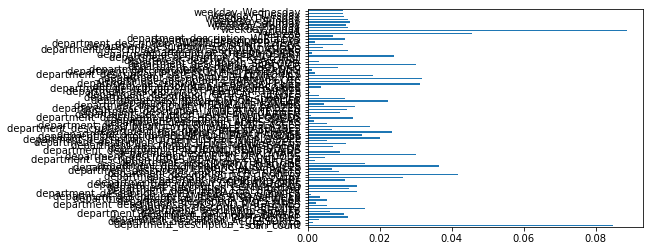

In [17]:
#feat_importances = pd.Series(model_fs.feature_importances_, index=X_train.columns)
#feat_importances.nlargest(50).plot(kind='barh')
#plt.show()

In [ ]:
#feat_importances.nlargest(50)

In [18]:
#selected_var = feat_importances.nlargest(50).index

Guardamos la selección de variables en un pickle.

In [4]:
#pickle.dump(selected_var, open("pickles/selected_var", "wb"))

Cargamos el pickle.

In [5]:
selected_var = pickle.load(open("pickles/selected_var","rb"))

## X train y X test after feature selection:

Una vez elegidas las variables a utlizar se extrae este subconjunto de los conjuntos de test y entrenamiento.

In [18]:
X_train_fs = X_train[selected_var]

In [19]:
X_test_fs = X_test[selected_var]

In [20]:
X_test_fs.shape

(12500, 50)

# Pruebas de Modelos

A continuación probamos varios modelos con varios hiperparámetros para darnos una idea de cuales modelos funcionan mejor con estos datos y para estos poder escoger posibles valores de hiperparámetros para probar en el magic loop posterior.

### Random Forest

In [44]:
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_fs, y_train)
y_model = model.predict(X_test_fs)

In [45]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model)))

Accuracy: 0.646180860403863


**Benchmark antes de ingeniería de características e imputación:** 0.6215

### Knn

In [23]:
%%time

model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train, y_train)
y_model_knn = model_knn.predict(X_test)

CPU times: user 3.16 s, sys: 0 ns, total: 3.16 s
Wall time: 3.21 s


In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_knn)))
print("Precision: {}".format(precision_score(y_test, y_model_knn, average=None)))

**Benchmark antes de ingeniería de características e imputación:** 0.5977

In [ ]:
#con corrección de menswear e imputación: 0.650319829424307

### SVM

In [32]:
%%time
model_svm = svm.SVC(kernel='linear', probability=True, random_state=0)
model_svm.fit(X_train_fs, y_train)
y_model_svm = model_svm.predict(X_test_fs)

CPU times: user 13min 51s, sys: 515 ms, total: 13min 52s
Wall time: 13min 54s


In [33]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_svm)))

Accuracy: 0.6660813579163009


**Benchmark antes de ingeniería de características e imputación:** 0.6195

### Árbol de Decisiones

In [36]:
%%time
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_fs, y_train)
y_model_dt = model_dt.predict(X_test_fs)

CPU times: user 784 ms, sys: 0 ns, total: 784 ms
Wall time: 783 ms


In [37]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_dt)))

Accuracy: 0.5752330783059493


### Gradient Boosting

In [40]:
%%time
model_gb = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10)
model_gb.fit(X_train_fs, y_train)
y_model_gb = model_gb.predict(X_test_fs)

CPU times: user 50.5 s, sys: 16 ms, total: 50.6 s
Wall time: 50.6 s


In [41]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_gb)))

Accuracy: 0.6190476190476191


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [29]:
%%time
model_lr = LogisticRegression(penalty='l2', C=1e5, solver='liblinear')
model_lr.fit(X_train, y_train)
y_model_lr = model_lr.predict(X_test)

CPU times: user 1min 17s, sys: 26.3 ms, total: 1min 17s
Wall time: 1min 17s


In [30]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_lr)))

Accuracy: 0.6399515029892554


## Ajuste de Hiperparámetros y Selección de Modelo con Magic Loop

Ahora metemos nuestros modelos seleccionados al magic loop junto con los conjuntos de hiperparámetros definidos por nosotros que hacen sentido con las pruebas echas anteriormente.

In [28]:
from time import time
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
def precision_at_k(y_true, y_scores, k):
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores])
    #return metrics.precision_score(y_true, y_pred, average = 'weighted', zero_division = 0)
    return metrics.precision_score(y_true, y_pred, average ='micro')

Definimos el diccionario de modelos a utilizar con sus posibles hiperparámetros.

In [22]:
def define_hyper_params():
    clfs = {
        'RF': RandomForestClassifier(n_estimators=100),
        'KNN': KNeighborsClassifier(n_neighbors=15),
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'DT': DecisionTreeClassifier(),
        'LR': LogisticRegression(penalty='l2', C=1e5, solver='liblinear')
        
            }

    grid = { 
        'RF':{'n_estimators': [10,100,500], 'max_depth': [10,25,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
        'KNN' :{'n_neighbors': [5,15,25,50],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']},
        'SVM' :{'C' :[0.00001,0.001,0.1,1],'kernel':['linear', 'rbf']},
        'GB': {'n_estimators': [1,10,100,500], 'learning_rate' : [0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,10,20,50]},
        'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
        'LR': { 'penalty': ['l1','l2'], 'C': [0.0001,0.001,0.01,0.1,1]}
           }

    return clfs, grid

Definimos la función de magic loop.

In [29]:
def magic_loop(models_to_run, clfs, grid, X, y, search = 1):
    for n in range(1, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        for index, clf in enumerate([clfs[x] for x in models_to_run]):
            print(models_to_run[index])
            parameter_values = grid[models_to_run[index]]
            try:
                if(search):
                    gs = GridSearchCV(clf, parameter_values, cv=5)
                    start = time()
                    y_pred_probs = gs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    y_score = gs.fit(X_train, y_train).decision_function(X_test)
                    print(precision_at_k(y_test, y_pred_probs, 0.05))
                    print("GridSearch time: " + (str)(time() - start))

                else:
                    start = time()
                    rs = RandomizedSearchCV(clf, parameter_values, cv=5)
                    #y_pred_probs = rs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    y_pred = rs.fit(X_train, y_train).predict(X_test)
                    #print(y_test)
                    #print(y_pred_probs)
                    print(rs.best_estimator_)
                    #print(precision_at_k(y_test.astype(float), y_pred_probs.astype(float), 0.05))
                    print("Precision: {}".format(precision_score(y_test, y_pred, average='micro',
                                                                zero_division=0)))
                    print("Recall: {}".format(recall_score(y_test, y_pred, average='micro',
                                                                zero_division=0)))
                    #print("RandomizedSearch time: " + (str)(time() - start))
            except IndexError as e:
                print('Error:', e)
                continue

Corremos el magic loop sobre nuestro conjunto de entrenamiento con selección de variables.

In [30]:
clfs, grid = define_hyper_params()
models = ['RF','KNN','SVM','GB','DT','LR']

In [31]:
X_fs = X_sample[selected_var]

Utilizamos el método de búsqueda de random search.

In [33]:
%%time
#RandomSearch
resultados = magic_loop(models, clfs, grid, X_fs, y_sample, search = 0)

RF


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RandomForestClassifier(max_depth=50, max_features='log2', min_samples_split=10)
Precision: 0.6632
Recall: 0.6632
KNN


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=25, weights='distance')
Precision: 0.63344
Recall: 0.63344
SVM


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


SVC(C=0.1, kernel='linear', probability=True, random_state=0)
Precision: 0.6672
Recall: 0.6672
GB


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GradientBoostingClassifier(learning_rate=0.01, max_depth=20, subsample=0.1)
Precision: 0.652
Recall: 0.652
DT


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


DecisionTreeClassifier(max_depth=100, max_features='sqrt', min_samples_split=10)
Precision: 0.57808
Recall: 0.57808
LR


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


LogisticRegression(C=1, penalty='l1', solver='liblinear')
Precision: 0.62704
Recall: 0.62704
CPU times: user 6h 50min 36s, sys: 30.2 s, total: 6h 51min 6s
Wall time: 6h 50min 48s


Comparando los valores de precisión notamos que los mejores modelos son SVM y Random Forest, con poca diferencia entre su precisión.